<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-I-Figols/blob/main/Ejercicio_22_Oct_(Inventario).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import math
from math import log, exp, sqrt, cos, acos, pi, sin, factorial
from statistics import mean, stdev, variance
from scipy.stats import norm, linregress, binom
import random as rnd
from random import random, gauss, expovariate, choice, seed
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from time import time  # lo da en segundos
from scipy.optimize import minimize
from numba import jit

# < > ∈ o ∉ |
#@jit(nopython=True)  # Decorador y quiere decir que copila en lenguaje ensamblador, por eso es mas rapido

Nos interesa el almacenamiento ya que si tenemos pocos recursos podemos perder una posibe venta y si tenemos mucho, tenemos que considerar el costo de almacenamiento

In [ ]:
# Inventario

T=300
s=10   # si tengo menos, el proovedo deja articulos
S=20    # numero maximo de articulos en almacen
q=20  # cantidad de articulos en el almacen
l_l=0.5   # parametro de proceso de Posson de llegada
t=0
tl=0       # tiempo de llegada del cliente
#tl= - (1/l_l)*log(random())
tr=20   # tiempo mas prooximo en el que llega el proovedor (dias ne este caso)
rep=30   # el proovedor va a venir cada 30 dias
v=0    # numero de articulos vedido
nv=0   # numero de articulos que no se vedieron pero pudieron haberse vendido (no habia en alacen)
costo=0   # costo de almacenamiento de los articulos
ganancia=0  # ganancia que vamos ganando
costounitario=0.5  # costo de almacenamiento de 1 articulo por la unidad de tiempo
gananciaunitaria=40  # ganancia de cada articulo vendido

while min(tl, tr) < T:  # no considere eventos fuera del intervalo
  ta=t
  t = min(tl, tr)
  costo = costo + (t - ta)*q*costounitario # aumenta en el periodo de tiempo por el numero de articulos por el costo de cada articulo
  if t==tl:    # llegada de un cliente
    if q > 0:   # numero de articulos en la bodega es mayor a cero (si hay articulos)
      q=q-1   # se vende un articuo entonces disminuye la canidad que tenemos
      print("Llegada", "%10.2f"%tl, q)
      v=v+1   # numero de ventas
      ganancia=ganancia+ gananciaunitaria   # ganancia por haber vendido un articulo
    else:
      print("Llegada", "%10.2f"%tl, q, "    Venta perdida")
      nv=nv+1   # ventas no realizadas
    tl=tl - (1/l_l)*log(random())   # simulo el proximo tiempo de llegada
  else:
    if q<s:
      q=S   # el proveedor deja articulos hasta que sean S
    print("Tiempo de reposicion", "%10.2f"%tr, q)
    tr=tr +  rep   # sigiente vez que llega el proveedor (por ahora, constante)

print("Ganancia:", ganancia)
print("Costo: ", costo)
print("Ganancia neta: ", ganancia - costo)
print("Numero de articulos no vedidos: ", nv)

Llegada       0.00 19
Llegada       3.20 18
Llegada       8.75 17
Llegada       8.83 16
Llegada       9.60 15
Llegada      10.20 14
Llegada      11.46 13
Llegada      11.93 12
Llegada      11.99 11
Tiempo de reposicion      20.00 11
Llegada      20.24 10
Llegada      20.65 9
Llegada      22.88 8
Llegada      28.75 7
Llegada      29.11 6
Llegada      29.52 5
Llegada      31.56 4
Llegada      31.74 3
Llegada      31.81 2
Llegada      40.35 1
Llegada      41.81 0
Llegada      47.56 0     Venta perdida
Llegada      48.65 0     Venta perdida
Llegada      49.35 0     Venta perdida
Tiempo de reposicion      50.00 20
Llegada      51.49 19
Llegada      52.88 18
Llegada      53.43 17
Llegada      56.53 16
Llegada      59.68 15
Llegada      59.87 14
Llegada      66.17 13
Llegada      69.42 12
Llegada      76.89 11
Llegada      77.35 10
Llegada      78.47 9
Tiempo de reposicion      80.00 20
Llegada      83.40 19
Llegada      83.49 18
Llegada      83.50 17
Llegada      84.28 16
Llegada      85.35 

Tambien podemos considerar otros factores que afecta la ganancia como el pago a empleados, costo de servicios, etc.

Llegada       0.00 19
Llegada       3.04 18
Llegada       4.42 17
Llegada       6.03 16
Llegada       7.49 15
Llegada      12.17 14
Llegada      15.32 13
Llegada      18.89 12
Tiempo de reposicion      20.00 12
Llegada      24.32 11
Llegada      24.95 10
Llegada      25.34 9
Llegada      26.70 8
Llegada      27.19 7
Llegada      27.80 6
Llegada      28.80 5
Llegada      29.01 4
Llegada      32.25 3
Llegada      35.12 2
Llegada      35.56 1
Llegada      37.94 0
Llegada      38.78 0     Venta perdida
Llegada      39.91 0     Venta perdida
Llegada      43.03 0     Venta perdida
Llegada      44.70 0     Venta perdida
Llegada      45.65 0     Venta perdida
Llegada      47.92 0     Venta perdida
Tiempo de reposicion      50.00 20
Llegada      50.73 19
Llegada      51.60 18
Llegada      55.73 17
Llegada      58.08 16
Llegada      60.19 15
Llegada      61.21 14
Llegada      63.12 13
Llegada      64.50 12
Llegada      65.73 11
Llegada      66.23 10
Llegada      67.52 9
Llegada      75.19 8
Tiem

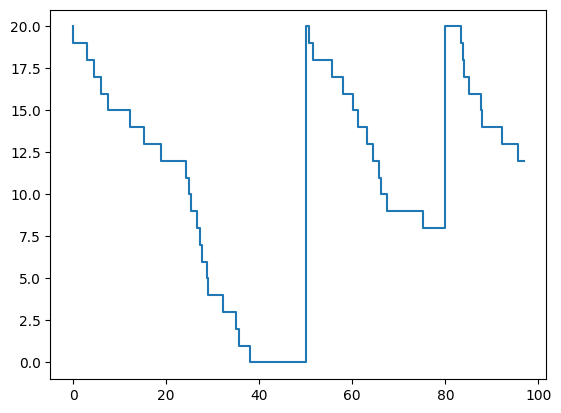

In [ ]:
T=100
s=10
S=20
q=20
l_l=0.5
t=0
tl=0
tr=20
rep=30
v=0
nv=0
costo=0
ganancia=0
costounitario=0.5
gananciaunitaria=40
lt=[]
lq=[]

while min(tl, tr) < T:
  ta=t
  lt. append(t)
  lq. append(q)
  t = min(tl, tr)
  lt. append(t)
  lq. append(q)
  costo = costo + (t - ta)*q*costounitario
  if t==tl:
    if q > 0:
      q=q-1
      print("Llegada", "%10.2f"%tl, q)
      v=v+1
      ganancia=ganancia+ gananciaunitaria
    else:
      print("Llegada", "%10.2f"%tl, q, "    Venta perdida")
      nv=nv+1
    tl=tl - (1/l_l)*log(random())
  else:
    if q<s:
      q=S
    print("Tiempo de reposicion", "%10.2f"%tr, q)
    tr=tr +  rep

print("Ganancia:", ganancia)
print("Costo: ", costo)
print("Ganancia neta: ", ganancia - costo)
print("Numero de articulos no vedidos: ", nv, nv*gananciaunitaria)
plt. plot(lt, lq)
plt. show()

Las lineas verticales no son parte del grafico

Son las veces que el proveedor deja articulos.

Llegada       0.00 19
Llegada       1.52 18
Llegada       9.18 17
Llegada      10.73 16
Llegada      11.80 15
Llegada      11.87 14
Llegada      13.37 13
Llegada      14.15 12
Llegada      15.31 11
Llegada      16.91 10
Tiempo de reposicion      20.00 10
Llegada      20.51 9
Llegada      28.10 8
Llegada      28.16 7
Llegada      29.58 6
Llegada      30.09 5
Llegada      30.32 4
Llegada      32.23 3
Llegada      33.52 2
Llegada      34.54 1
Llegada      35.63 0
Llegada      38.16 0     Venta perdida
Llegada      43.20 0     Venta perdida
Llegada      46.17 0     Venta perdida
Llegada      47.49 0     Venta perdida
Llegada      47.80 0     Venta perdida
Llegada      48.69 0     Venta perdida
Llegada      48.96 0     Venta perdida
Tiempo de reposicion      50.00 20
Llegada      50.62 19
Llegada      59.04 18
Llegada      63.16 17
Llegada      64.20 16
Llegada      64.34 15
Llegada      67.78 14
Llegada      69.83 13
Llegada      72.91 12
Llegada      79.61 11
Tiempo de reposicion      80.

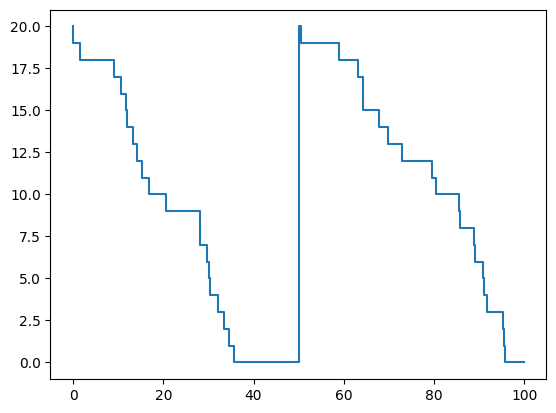

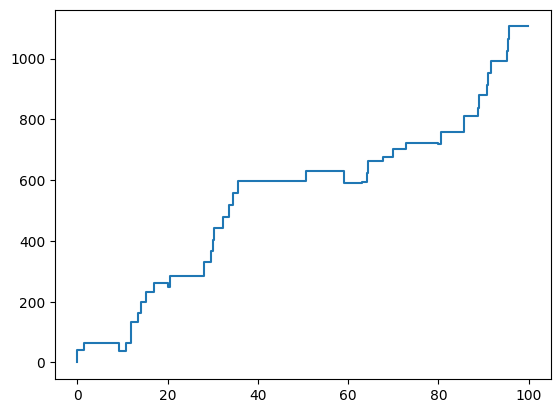

In [ ]:
T=100
s=10
S=20
q=20
l_l=0.5
t=0
tl=0
tr=20
rep=30
v=0
nv=0
costo=0
ganancia=0
costounitario=0.5
gananciaunitaria=40
lt=[]
lq=[]
lgn=[]    # lgn la ganancia neta
while min(tl, tr) < T:
  ta=t
  lt. append(t)
  lq. append(q)
  lgn. append(ganancia - costo)
  t = min(tl, tr)
  lt. append(t)
  lq. append(q)
  lgn. append(ganancia - costo)
  costo = costo + (t - ta)*q*costounitario
  if t==tl:
    if q > 0:
      q=q-1
      print("Llegada", "%10.2f"%tl, q)
      v=v+1
      ganancia=ganancia+ gananciaunitaria
    else:
      print("Llegada", "%10.2f"%tl, q, "    Venta perdida")
      nv=nv+1
    tl=tl - (1/l_l)*log(random())
  else:
    if q<s:
      q=S
    print("Tiempo de reposicion", "%10.2f"%tr, q)
    tr=tr +  rep

print("Ganancia:", ganancia)
print("Costo: ", costo)
print("Ganancia neta: ", ganancia - costo)
print("Numero de articulos no vedidos: ", nv,"=", nv*gananciaunitaria)
plt.plot(lt, lq)
plt.show()
plt.plot(lt, lgn)
plt.show()


In [13]:
T=100
s=50
S=150
q=S
l_l=0.5
t=0
tl=random.exponential(l_l)
tr=20
rep=30
v=0
nv=0
costo=0
ganancia=0
costounitario=0.05
gananciaunitaria=30

while min(tl, tr) < T:
  ta=t
  t=min(tl, tr)
  costo=costo + (t - ta)*q*costounitario
  if t==tl:
    dem=random.poisson(3)
    if q>=dem:
      q=q - dem
      #print("Llegada ", "%10.2f"%tl, "Demanda ", dem, q)
      v=v+dem
      ganancia=ganancia + gananciaunitaria*dem
    else:
      nv=nv+dem-q
      ganancia=ganancia + q*gananciaunitaria
      #print("Venta perdida", "%10.2f"%tl, "Demanda ", dem, "Ven....")
      q=0
    tl=tl+random.exponential(l_l)
  else:
    if q<s:
      q=S
    #print("Tiempo de reposicion", "%10.2f"%tr, q)
    tr=tr+rep

print("Ganancia: ", ganancia)
print("Costo: ", costo)
print("Ganancia neta: ", ganancia-costo)


# < >

Ganancia:  12360
Costo:  307.86785104267665
Ganancia neta:  12052.132148957324


In [14]:
def f(s):
  T=200
  S=150
  q=S
  l_l=0.5
  t=0
  tl=random.exponential(1/l_l)
  tr=20
  rep=30
  v=0
  nv=0
  costo=0
  ganancia=0
  costounitario=0.2
  gananciaunitaria=30

  while min(tl, tr) < T:
    ta=t
    t=min(tl, tr)
    costo=costo + (t - ta)*q*costounitario
    if t==tl:
      dem=random.poisson(3)
      if q>=dem:
        q=q - dem
        #print("Llegada ", "%10.2f"%tl, "Demanda ", dem, q)
        v=v+dem
        ganancia=ganancia + gananciaunitaria*dem
      else:
        nv=nv+dem-q
        ganancia=ganancia + q*gananciaunitaria
        #print("Venta perdida", "%10.2f"%tl, "Demanda ", dem, "Ven....")
        q=0
      tl=tl+random.exponential(1/l_l)
    else:
      if q<s:
        q=S
      #print("Tiempo de reposicion", "%10.2f"%tr, q)
      tr=tr+rep
  return ganancia - costo

n=10000
s=20
while s<140:
  suma=0
  for i in range(n):
    suma=suma+f(s)
  print(s, suma/n)
  s=s+10

20 5452.641340848159
30 5449.313787067381
40 5392.618058962913
50 5256.38363504984
60 5135.137435603659
70 4980.725309616888
80 4812.694725859013
90 4646.467380252116
100 4486.6425690114465
110 4305.274248019658
120 4058.3627686412974
130 3943.005179347168


In [20]:
from numba import jit
@jit(nopython=True)

def f(s):
  T=200
  S=150
  q=S
  l_l=0.5
  t=0
  tl=random.exponential(1/l_l)
  tr=20
  rep=30
  v=0
  nv=0
  costo=0
  ganancia=0
  costounitario=0.2
  gananciaunitaria=30

  while min(tl, tr) < T:
    ta=t
    t=min(tl, tr)
    costo=costo + (t - ta)*q*costounitario
    if t==tl:
      dem=random.poisson(3)
      if q>=dem:
        q=q - dem
        #print("Llegada ", "%10.2f"%tl, "Demanda ", dem, q)
        v=v+dem
        ganancia=ganancia + gananciaunitaria*dem
      else:
        nv=nv+dem-q
        ganancia=ganancia + q*gananciaunitaria
        #print("Venta perdida", "%10.2f"%tl, "Demanda ", dem, "Ven....")
        q=0
      tl=tl+random.exponential(1/l_l)
    else:
      if q<s:
        q=S
      #print("Tiempo de reposicion", "%10.2f"%tr, q)
      tr=tr+rep
  return ganancia - costo

n=10000
s=20
while s<140:
  suma=0
  for i in range(n):
    suma=suma+f(s)
  print(s, suma/n)
  s=s+10

20 5433.735429694096
30 5449.77447956417
40 5394.212085930546
50 5275.802859808717
60 5115.842669680576
70 4992.641801903668
80 4822.733567371738
90 4658.008498597286
100 4498.095128902842
110 4278.14260542111
120 4059.6532735858814
130 3925.786391892413


Optimizar el valor esperado

In [21]:
n=10000
s=10
while s<50:
  suma=0
  for i in range(n):
    suma=suma+f(s)
  print(s, suma/n)
  s=s+5

10 5323.63182672631
15 5394.29803307019
20 5439.364047909794
25 5477.014641529737
30 5468.49665368288
35 5434.197931233713
40 5390.2849411298075
45 5332.537001492116


10 5355.717848899362
15 5391.396270384371
20 5439.27012316854
25 5461.637423174912
30 5459.271545197704
35 5410.85590988333
40 5386.672650640936
45 5323.901530398611


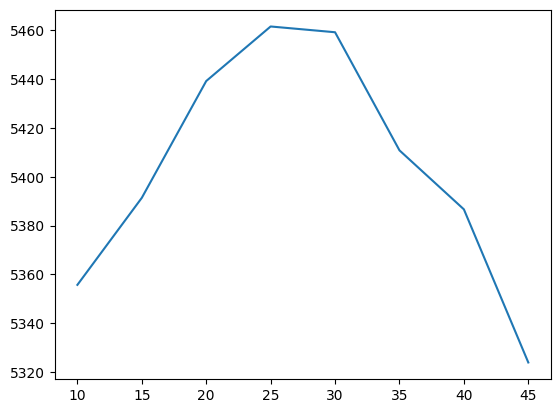

In [23]:
n=10000
s=10
ls=[]
l=[]
while s<50:
  suma=0
  for i in range(n):
    suma=suma+f(s)
  ls.append(s)
  l.append(suma/n)
  print(s, suma/n)
  s=s+5
plt.plot(ls, l)
plt.show()

10 5333.411133777683
12 5361.569490664664
14 5384.091567458828
16 5403.37644425201
18 5422.8906485769785
20 5436.342584992095
22 5449.46369295392
24 5456.196761865961
26 5458.310463675652
28 5461.636733715126
30 5459.777589067954
32 5454.3953716576925
34 5442.49764446777
36 5430.381521624129
38 5413.09527403474
40 5394.40759294939
42 5374.287110225159
44 5352.273870841726
46 5325.02017109311
48 5301.561911148472


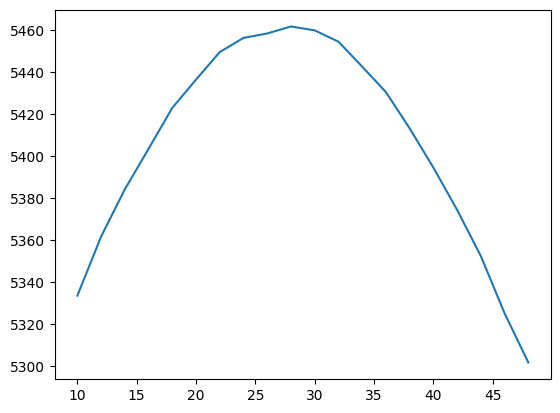

In [27]:
n=1000000
s=10
ls=[]
l=[]
while s<50:
  suma=0
  for i in range(n):
    suma=suma+f(s)
  ls.append(s)
  l.append(suma/n)
  print(s, suma/n)
  s=s+2
plt.plot(ls, l)
plt.show()